In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
import keras_tuner as kt
from keras_tuner import RandomSearch

In [3]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [4]:
import relative_accuracy as ra
from statistics import mean, stdev
import geh as ga

In [5]:
# Load all Inputs and Output Data

# 5 mins (1 step ahead)
Deep_train_5   = np.load("Deep_train_5_multi.npz")['x'] 
Output_train_5 = np.load("Deep_train_5_multi.npz")['y']

Deep_test_5   = np.load("Deep_test_5_multi.npz")['x'] 
Output_test_5 = np.load("Deep_test_5_multi.npz")['y'] 

# 15 mins (3 steps ahead)
Deep_train_15   = np.load("Deep_train_15_multi.npz")['x'] 
Output_train_15 = np.load("Deep_train_15_multi.npz")['y']

Deep_test_15   = np.load("Deep_test_15_multi.npz")['x'] 
Output_test_15 = np.load("Deep_test_15_multi.npz")['y']

# 30 mins (6 steps ahead)
Deep_train_30   = np.load("Deep_train_30_multi.npz")['x'] 
Output_train_30 = np.load("Deep_train_30_multi.npz")['y']

Deep_test_30   = np.load("Deep_test_30_multi.npz")['x'] 
Output_test_30 = np.load("Deep_test_30_multi.npz")['y']

# 60 mins (12 steps ahead)
Deep_train_60   = np.load("Deep_train_60_multi.npz")['x'] 
Output_train_60 = np.load("Deep_train_60_multi.npz")['y']

Deep_test_60   = np.load("Deep_test_60_multi.npz")['x'] 
Output_test_60 = np.load("Deep_test_60_multi.npz")['y']

In [6]:
# Wide Week Data
Xtrain = joblib.load("002weeks_train.save") 
Xtest = joblib.load("002weeks_test.save") 

# Wide Day Data
Xtrain_day = joblib.load("002days_train.save") 
Xtest_day = joblib.load("002days_test.save") 

In [7]:
# 5 mins
# Delete first 15 samples
Wide_train_5 = np.delete(Xtrain, np.s_[0:15], 0)
Wide_test_5 = np.delete(Xtest, np.s_[0:15], 0)

Wide_train_5_day = np.delete(Xtrain_day, np.s_[0:15], 0)
Wide_test_5_day = np.delete(Xtest_day, np.s_[0:15], 0)

In [8]:
# 15 mins
# Delete first 17 samples
Wide_train_15 = np.delete(Xtrain, np.s_[0:17], 0)
Wide_test_15 = np.delete(Xtest, np.s_[0:17], 0)

Wide_train_15_day = np.delete(Xtrain_day, np.s_[0:17], 0)
Wide_test_15_day = np.delete(Xtest_day, np.s_[0:17], 0)

In [9]:
# 30 mins
# Delete first 20 samples
Wide_train_30 = np.delete(Xtrain, np.s_[0:20], 0)
Wide_test_30 = np.delete(Xtest, np.s_[0:20], 0)

Wide_train_30_day = np.delete(Xtrain_day, np.s_[0:20], 0)
Wide_test_30_day = np.delete(Xtest_day, np.s_[0:20], 0)

In [10]:
# 60 mins
# Delete first 27 samples
Wide_train_60 = np.delete(Xtrain, np.s_[0:26], 0)
Wide_test_60 = np.delete(Xtest, np.s_[0:26], 0)

Wide_train_60_day = np.delete(Xtrain_day, np.s_[0:26], 0)
Wide_test_60_day = np.delete(Xtest_day, np.s_[0:26], 0)

In [11]:
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 

C:\Users\mesug\anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [12]:
Test      = pd.read_csv('01test_scaled.csv', index_col=None, parse_dates=[0])

# Reshape Samples

The first step is to split the input sequences into subsequences that can be processed by the CNN model. Here, each spatio-temporal sample can be split into three sub-samples, each with five time steps. The CNN can interpret each subsequence of five time steps and provide a time series of interpretations of the subsequences to the LSTM model to process as input.

In [13]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 7              # No of loop detectors
n_seq = 3                    # Subsequences
n_steps = 5                  # time-step per subsequence
val_percent = 0.2            # 2 weeks
batch_size = 32

#### 5 mins

In [14]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt5 = Deep_train_5.reshape((Deep_train_5.shape[0], n_seq, n_steps, n_features))
yt5 = scaler.inverse_transform(Output_train_5)

In [15]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv5 = Deep_test_5.reshape((Deep_test_5.shape[0], n_seq, n_steps, n_features))
yv5 = scaler.inverse_transform(Output_test_5)

#### 15 mins

In [16]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt15 = Deep_train_15.reshape((Deep_train_15.shape[0], n_seq, n_steps, n_features))
yt15 = scaler.inverse_transform(Output_train_15)

In [17]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv15 = Deep_test_15.reshape((Deep_test_15.shape[0], n_seq, n_steps, n_features))
yv15 = scaler.inverse_transform(Output_test_15)

#### 30 mins

In [18]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt30 = Deep_train_30.reshape((Deep_train_30.shape[0], n_seq, n_steps, n_features))
yt30 = scaler.inverse_transform(Output_train_30)

In [19]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv30 = Deep_test_30.reshape((Deep_test_30.shape[0], n_seq, n_steps, n_features))
yv30 = scaler.inverse_transform(Output_test_30)

#### 60 mins

In [20]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt60 = Deep_train_60.reshape((Deep_train_60.shape[0], n_seq, n_steps, n_features))
yt60 = scaler.inverse_transform(Output_train_60)

In [21]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv60 = Deep_test_60.reshape((Deep_test_60.shape[0], n_seq, n_steps, n_features))
yv60 = scaler.inverse_transform(Output_test_60)

### Reshaping the Data for Conv2D layer

For Conv2D, there is a need to add one more dimension to show we're dealing with 1 channel (since technically the images are in black and white, only showing values from 0-max flow on a single channel).

Conv1D - strides in 1 dimension
Conv2D - strides in 2 dimensions

In [22]:
# define no_of_channels
n_channels = 1

In [23]:
# Train data
Xt5  =  Xt5.reshape(Xt5.shape[0], n_seq, n_steps, n_features, n_channels)
Xt15 =  Xt15.reshape(Xt15.shape[0], n_seq, n_steps, n_features, n_channels)
Xt30 =  Xt30.reshape(Xt30.shape[0], n_seq, n_steps, n_features, n_channels)
Xt60 =  Xt60.reshape(Xt60.shape[0], n_seq, n_steps, n_features, n_channels)

# Validation data
Xv5  =  Xv5.reshape(Xv5.shape[0], n_seq, n_steps, n_features, n_channels)
Xv15 =  Xv15.reshape(Xv15.shape[0], n_seq, n_steps, n_features, n_channels)
Xv30 =  Xv30.reshape(Xv30.shape[0], n_seq, n_steps, n_features, n_channels)
Xv60 =  Xv60.reshape(Xv60.shape[0], n_seq, n_steps, n_features, n_channels)

In [24]:
Wide_train_5 = np.expand_dims(Wide_train_5, 1)
Wide_train_15 = np.expand_dims(Wide_train_15, 1)
Wide_train_30 = np.expand_dims(Wide_train_30, 1)
Wide_train_60 = np.expand_dims(Wide_train_60, 1)

Wide_test_5 = np.expand_dims(Wide_test_5, 1)
Wide_test_15 = np.expand_dims(Wide_test_15, 1)
Wide_test_30 = np.expand_dims(Wide_test_30, 1)
Wide_test_60 = np.expand_dims(Wide_test_60, 1)

In [25]:
Wide_train_5_day = np.expand_dims(Wide_train_5_day, 1)
Wide_train_15_day = np.expand_dims(Wide_train_15_day, 1)
Wide_train_30_day = np.expand_dims(Wide_train_30_day, 1)
Wide_train_60_day = np.expand_dims(Wide_train_60_day, 1)

Wide_test_5_day = np.expand_dims(Wide_test_5_day, 1)
Wide_test_15_day = np.expand_dims(Wide_test_15_day, 1)
Wide_test_30_day = np.expand_dims(Wide_test_30_day, 1)
Wide_test_60_day = np.expand_dims(Wide_test_60_day, 1)

In [26]:
Wt5  = Wide_train_5
Wt15 = Wide_train_15
Wt30 = Wide_train_30
Wt60 = Wide_train_60

Wv5  = Wide_test_5
Wv15 = Wide_test_15
Wv30 = Wide_test_30
Wv60 = Wide_test_60

In [27]:
Wt5x  = Wide_train_5_day
Wt15x = Wide_train_15_day
Wt30x = Wide_train_30_day
Wt60x = Wide_train_60_day

Wv5x  = Wide_test_5_day
Wv15x = Wide_test_15_day
Wv30x = Wide_test_30_day
Wv60x = Wide_test_60_day

# CNN-LSTM model

In [28]:
from tensorflow import keras
from keras_self_attention import SeqSelfAttention

# Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [29]:
stop = keras.callbacks.EarlyStopping(
    monitor = 'val_loss', 
    patience = 5, 
    restore_best_weights = True)

In [30]:
Wide_train_5.shape

(31089, 1, 14)

In [31]:
Xt5.shape[1:]

(3, 5, 7, 1)

# 5 mins ahead

In [32]:
def build_model_5(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wide_train_5.shape[1:], name="wide_week")
    channel_Widex = keras.layers.Input(shape=Wide_train_5_day.shape[1:], name="wide_day")
    channel_Deep = keras.layers.Input(shape=Xt5.shape[1:], name="weep_input")
    
    # Wide Model
    Wide_5 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_week_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Wide)
    
    Wide_5x = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_day_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Widex)
       
    # Deep Model
    # CNN 
    CNN_5a = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    CNN_5b = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(CNN_5a)
    flatten_5 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_5b)
    # LSTM          
    LSTM_5a = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(flatten_5)
    LSTM_5b = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(LSTM_5a)
    Att_5 = SeqSelfAttention(attention_activation='tanh')(LSTM_5b)
    Reshaped_5 = keras.layers.Flatten()(Att_5)
    
    # Concatenation 
    concat = keras.layers.concatenate([Wide_5, Wide_5x, Reshaped_5])
    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(concat)
    
    # Model
    model_5 = keras.Model(inputs=[channel_Wide, channel_Widex, channel_Deep], outputs=[output])

    # Compile
    model_5.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_5

In [33]:
tuner5 = RandomSearch(
    build_model_5,
    objective="val_loss",
    max_trials=30,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="6ai-Conv-LSTM-5",
)

INFO:tensorflow:Reloading Oracle from existing project C:\Runs\6ai-Conv-LSTM-5\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Runs\6ai-Conv-LSTM-5\tuner0.json


In [34]:
tuner5.search_space_summary()

Search space summary
Default search space size: 6
wide_week_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
wide_day_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [35]:
tuner5.search((Wt5, Wt5x, Xt5), yt5, epochs=200,
           validation_split = val_percent,
           callbacks = [early_stop],
           verbose=2)

Trial 30 Complete [00h 49m 27s]
val_loss: 535.6563720703125

Best val_loss So Far: 501.7811737060547
Total elapsed time: 12h 32m 08s
INFO:tensorflow:Oracle triggered exit


In [36]:
tuner5.results_summary(1)

Results summary
Results in C:\Runs\6ai-Conv-LSTM-5
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
wide_week_LSTM: 9
wide_day_LSTM: 71
filters: 384
kernel_size: 3
units_LSTM: 82
learning_rate: 0.001
Score: 501.7811737060547


### Best Model

In [37]:
best_hp5 = tuner5.get_best_hyperparameters()[0]
model5 = tuner5.hypermodel.build(best_hp5)

In [38]:
scaler_filename = "Best_HP/6ai-Conv_LSTM-5"
joblib.dump(best_hp5, scaler_filename) 

['Best_HP/6ai-Conv_LSTM-5']

In [39]:
model5.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 weep_input (InputLayer)        [(None, 3, 5, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_3 (TimeDistri  (None, 3, 3, 5, 384  3840       ['weep_input[0][0]']             
 buted)                         )                                                                 
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 1, 3, 384  1327488    ['time_distributed_3[0][0]']     
 buted)                         )                                                           

In [40]:
model5.fit((Wt5, Wt5x, Xt5), yt5, 
           epochs = 100,
           verbose = 1)

Epoch 1/100
972/972 [==============================] - 123s 115ms/step - loss: 2352.9260 - mean_absolute_error: 30.7371 - root_mean_squared_error: 48.5070 - mean_absolute_percentage_error: 37265060.0000
Epoch 2/100
972/972 [==============================] - 112s 115ms/step - loss: 881.7930 - mean_absolute_error: 22.0723 - root_mean_squared_error: 29.6950 - mean_absolute_percentage_error: 36584068.0000
Epoch 3/100
972/972 [==============================] - 113s 116ms/step - loss: 733.0685 - mean_absolute_error: 20.0682 - root_mean_squared_error: 27.0752 - mean_absolute_percentage_error: 37538960.0000
Epoch 4/100
972/972 [==============================] - 112s 115ms/step - loss: 690.7543 - mean_absolute_error: 19.4439 - root_mean_squared_error: 26.2822 - mean_absolute_percentage_error: 38708196.0000
Epoch 5/100
972/972 [==============================] - 112s 115ms/step - loss: 658.7016 - mean_absolute_error: 18.9571 - root_mean_squared_error: 25.6652 - mean_absolute_percentage_error: 400

Epoch 15/100
972/972 [==============================] - 112s 115ms/step - loss: 528.3112 - mean_absolute_error: 17.0130 - root_mean_squared_error: 22.9850 - mean_absolute_percentage_error: 8739004.0000
Epoch 16/100
972/972 [==============================] - 112s 115ms/step - loss: 519.1397 - mean_absolute_error: 16.8812 - root_mean_squared_error: 22.7846 - mean_absolute_percentage_error: 8199802.5000
Epoch 17/100
972/972 [==============================] - 112s 115ms/step - loss: 515.9958 - mean_absolute_error: 16.8354 - root_mean_squared_error: 22.7155 - mean_absolute_percentage_error: 9072824.0000
Epoch 18/100
972/972 [==============================] - 111s 114ms/step - loss: 513.8540 - mean_absolute_error: 16.8049 - root_mean_squared_error: 22.6683 - mean_absolute_percentage_error: 6854893.0000
Epoch 19/100
972/972 [==============================] - 111s 114ms/step - loss: 506.1824 - mean_absolute_error: 16.6880 - root_mean_squared_error: 22.4985 - mean_absolute_percentage_error: 787

972/972 [==============================] - 104s 107ms/step - loss: 472.5568 - mean_absolute_error: 16.1197 - root_mean_squared_error: 21.7384 - mean_absolute_percentage_error: 4324374.5000
Epoch 44/100
972/972 [==============================] - 104s 107ms/step - loss: 472.1652 - mean_absolute_error: 16.1150 - root_mean_squared_error: 21.7294 - mean_absolute_percentage_error: 5305771.0000
Epoch 45/100
972/972 [==============================] - 104s 107ms/step - loss: 471.3389 - mean_absolute_error: 16.1154 - root_mean_squared_error: 21.7103 - mean_absolute_percentage_error: 4925736.5000
Epoch 46/100
972/972 [==============================] - 104s 107ms/step - loss: 470.1754 - mean_absolute_error: 16.0844 - root_mean_squared_error: 21.6835 - mean_absolute_percentage_error: 5020431.0000
Epoch 47/100
972/972 [==============================] - 104s 107ms/step - loss: 471.4460 - mean_absolute_error: 16.0919 - root_mean_squared_error: 21.7128 - mean_absolute_percentage_error: 5300059.5000
Epo

972/972 [==============================] - 102s 105ms/step - loss: 451.5661 - mean_absolute_error: 15.7640 - root_mean_squared_error: 21.2501 - mean_absolute_percentage_error: 4563798.5000
Epoch 72/100
972/972 [==============================] - 102s 105ms/step - loss: 455.0645 - mean_absolute_error: 15.8312 - root_mean_squared_error: 21.3322 - mean_absolute_percentage_error: 4004755.7500
Epoch 73/100
972/972 [==============================] - 102s 105ms/step - loss: 452.1924 - mean_absolute_error: 15.7866 - root_mean_squared_error: 21.2648 - mean_absolute_percentage_error: 4828445.5000
Epoch 74/100
972/972 [==============================] - 102s 105ms/step - loss: 453.1678 - mean_absolute_error: 15.7927 - root_mean_squared_error: 21.2877 - mean_absolute_percentage_error: 4542030.0000
Epoch 75/100
972/972 [==============================] - 102s 105ms/step - loss: 450.6289 - mean_absolute_error: 15.7493 - root_mean_squared_error: 21.2280 - mean_absolute_percentage_error: 4320422.0000
Epo

972/972 [==============================] - 102s 105ms/step - loss: 433.7364 - mean_absolute_error: 15.4668 - root_mean_squared_error: 20.8263 - mean_absolute_percentage_error: 4515795.5000
Epoch 100/100
972/972 [==============================] - 102s 105ms/step - loss: 432.9356 - mean_absolute_error: 15.4554 - root_mean_squared_error: 20.8071 - mean_absolute_percentage_error: 4430637.0000


In [41]:
model5.save("my_dir/6ai-Conv-LSTM-5")

INFO:tensorflow:Assets written to: my_dir/6ai-Conv-LSTM-5\assets


In [42]:
metrics5 = pd.DataFrame(model5.history.history)

<AxesSubplot:>

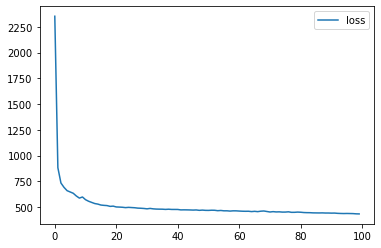

In [43]:
metrics5[['loss']].plot()

In [32]:
model5 = keras.models.load_model("my_dir/6ai-Conv-LSTM-5") 

In [33]:
model5.predict((Wv5, Wv5x, Xv5))

array([[ 70.62493 ,  71.54001 ,  76.58073 , ...,  72.43489 ,  50.328564,
         50.698395],
       [ 63.5157  ,  65.24812 ,  69.11455 , ...,  67.1625  ,  44.83884 ,
         45.719536],
       [ 60.12734 ,  61.69774 ,  65.25823 , ...,  63.772095,  45.086956,
         46.045845],
       ...,
       [140.17044 , 144.79955 , 156.70667 , ..., 155.73622 , 102.93774 ,
         90.69725 ],
       [125.738434, 130.36275 , 138.58469 , ..., 130.6186  ,  87.36866 ,
         78.39825 ],
       [122.36532 , 125.6228  , 138.19394 , ..., 140.37431 ,  93.70591 ,
         84.93205 ]], dtype=float32)

# 15 mins ahead

In [39]:
def build_model_15(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wide_train_15.shape[1:], name="wide_week")
    channel_Widex = keras.layers.Input(shape=Wide_train_15_day.shape[1:], name="wide_day")
    channel_Deep = keras.layers.Input(shape=Xt15.shape[1:], name="deep_input")
    
    # Wide Model
    Wide_15 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_week_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Wide)
    
    Wide_15x = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_day_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Widex)
    
    # Deep Model
    # CNN 
    CNN_15a = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    CNN_15b = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(CNN_15a)
    flatten_15 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_15b)
    # LSTM          
    LSTM_15a = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(flatten_15)
    LSTM_15b = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(LSTM_15a)
    Att_15 = SeqSelfAttention(attention_activation='tanh')(LSTM_15b)
    Reshaped_15 = keras.layers.Flatten()(Att_15)
    
    # Concatenation 
    concat = keras.layers.concatenate([Wide_15, Wide_15x, Reshaped_15])
    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(concat)
    
    # Model
    model_15 = keras.Model(inputs=[channel_Wide, channel_Widex, channel_Deep], outputs=[output])

    # Compile
    model_15.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_15

In [40]:
tuner15 = RandomSearch(
    build_model_15,
    objective="val_loss",
    max_trials=30,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="6ai-Conv-LSTM-15",
)

INFO:tensorflow:Reloading Oracle from existing project C:\Runs\6ai-Conv-LSTM-15\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Runs\6ai-Conv-LSTM-15\tuner0.json


In [41]:
tuner15.search_space_summary()

Search space summary
Default search space size: 6
wide_week_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
wide_day_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [42]:
tuner15.search((Wt15, Wt15x, Xt15), yt15, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop], 
            verbose=2)

Trial 31 Complete [01h 30m 20s]
val_loss: 891.1954345703125

Best val_loss So Far: 627.5131225585938
Total elapsed time: 03h 05m 48s
INFO:tensorflow:Oracle triggered exit


In [43]:
tuner15.results_summary(1)

Results summary
Results in C:\Runs\6ai-Conv-LSTM-15
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
wide_week_LSTM: 20
wide_day_LSTM: 39
filters: 160
kernel_size: 2
units_LSTM: 80
learning_rate: 0.0001
Score: 627.5131225585938


### Best model

In [44]:
best_hp15 = tuner15.get_best_hyperparameters()[0]
model15 = tuner15.hypermodel.build(best_hp15)

In [45]:
scaler_filename = "Best_HP/6ai-Conv_LSTM-15"
joblib.dump(best_hp15, scaler_filename) 

['Best_HP/6ai-Conv_LSTM-15']

In [46]:
model15.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 3, 5, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_3 (TimeDistri  (None, 3, 4, 6, 160  800        ['deep_input[0][0]']             
 buted)                         )                                                                 
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 3, 5, 160  102560     ['time_distributed_3[0][0]']     
 buted)                         )                                                           

In [47]:
model15.fit((Wt15, Wt15x, Xt15), yt15, 
           epochs = 100, 
           verbose = 1)

Epoch 1/100
972/972 [==============================] - 42s 32ms/step - loss: 7059.1157 - mean_absolute_error: 48.1131 - root_mean_squared_error: 84.0186 - mean_absolute_percentage_error: 41126380.0000
Epoch 2/100
972/972 [==============================] - 31s 32ms/step - loss: 1151.6510 - mean_absolute_error: 25.2947 - root_mean_squared_error: 33.9360 - mean_absolute_percentage_error: 42385868.00001s - loss: 1152.3030 - mean_absolute_error: 25.3097 - root_mean_squared_error: 33.9456 - mean_absolute_percentage_error: 42813 - ETA: 0s - loss: 1153.6544 - mean_absolute_error: 25.3237 - root_mean_squared_error: 33.9655 - mean_absolute_per
Epoch 3/100
972/972 [==============================] - 31s 32ms/step - loss: 1141.8505 - mean_absolute_error: 25.0336 - root_mean_squared_error: 33.7913 - mean_absolute_percentage_error: 42844340.0000
Epoch 4/100
972/972 [==============================] - 31s 32ms/step - loss: 1053.7388 - mean_absolute_error: 23.8039 - root_mean_squared_error: 32.4613 - me

972/972 [==============================] - 38s 39ms/step - loss: 549.4042 - mean_absolute_error: 17.3258 - root_mean_squared_error: 23.4394 - mean_absolute_percentage_error: 5750830.5000
Epoch 79/100
972/972 [==============================] - 39s 40ms/step - loss: 551.5423 - mean_absolute_error: 17.3528 - root_mean_squared_error: 23.4849 - mean_absolute_percentage_error: 6253033.5000
Epoch 80/100
972/972 [==============================] - 39s 40ms/step - loss: 550.1843 - mean_absolute_error: 17.3420 - root_mean_squared_error: 23.4560 - mean_absolute_percentage_error: 6326911.5000
Epoch 81/100
972/972 [==============================] - 39s 40ms/step - loss: 547.3912 - mean_absolute_error: 17.2974 - root_mean_squared_error: 23.3964 - mean_absolute_percentage_error: 5982054.5000
Epoch 82/100
972/972 [==============================] - 38s 39ms/step - loss: 548.7242 - mean_absolute_error: 17.3202 - root_mean_squared_error: 23.4249 - mean_absolute_percentage_error: 5727830.5000
Epoch 83/100


In [48]:
model15.save("my_dir/6ai-Conv-LSTM-15")

INFO:tensorflow:Assets written to: my_dir/6ai-Conv-LSTM-15\assets


In [49]:
metrics15 = pd.DataFrame(model15.history.history)

<AxesSubplot:>

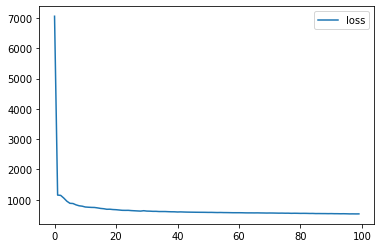

In [50]:
metrics15[['loss']].plot()

In [36]:
model15 = keras.models.load_model("my_dir/6ai-Conv-LSTM-15")

In [37]:
model15.predict((Wv15, Wv15x, Xv15))

array([[ 62.40092 ,  65.96764 ,  69.66801 , ...,  70.30959 ,  46.35786 ,
         45.25941 ],
       [ 62.74642 ,  65.36727 ,  70.11772 , ...,  69.48972 ,  45.32623 ,
         46.49333 ],
       [ 63.943905,  66.183624,  70.837616, ...,  70.24171 ,  46.051163,
         48.66731 ],
       ...,
       [136.44579 , 139.11201 , 154.78514 , ..., 154.78027 , 102.37126 ,
         97.545525],
       [129.6003  , 133.63426 , 145.89555 , ..., 147.3115  ,  96.74164 ,
         90.41812 ],
       [123.01246 , 128.53117 , 137.22488 , ..., 138.32808 ,  89.25339 ,
         81.831566]], dtype=float32)

# 30 mins ahead

In [40]:
def build_model_30(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wide_train_30.shape[1:], name="wide_week")
    channel_Widex = keras.layers.Input(shape=Wide_train_30_day.shape[1:], name="wide_day")
    channel_Deep = keras.layers.Input(shape=Xt30.shape[1:], name="deep_input")
    
    # Wide Model
    Wide_30 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_week_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Wide)
    
    Wide_30x = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_day_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Widex)
    
    # Deep Model
    # CNN 
    CNN_30a = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    CNN_30b = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(CNN_30a)
    flatten_30 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_30b)
    # LSTM          
    LSTM_30a = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(flatten_30)
    LSTM_30b = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(LSTM_30a)
    Att_30 = SeqSelfAttention(attention_activation='tanh')(LSTM_30b)
    Reshaped_30 = keras.layers.Flatten()(Att_30)
    
    # Concatenation 
    concat = keras.layers.concatenate([Wide_30, Wide_30x, Reshaped_30])
    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(concat)
    
    # Model
    model_30 = keras.Model(inputs=[channel_Wide, channel_Widex, channel_Deep], outputs=[output])

    # Compile
    model_30.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_30

In [41]:
tuner30 = RandomSearch(
    build_model_30,
    objective="val_loss",
    max_trials=30,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="6ai-Conv-LSTM-30",
)

INFO:tensorflow:Reloading Oracle from existing project C:\Runs\6ai-Conv-LSTM-30\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Runs\6ai-Conv-LSTM-30\tuner0.json


In [42]:
tuner30.search_space_summary()

Search space summary
Default search space size: 6
wide_week_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
wide_day_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [43]:
tuner30.search((Wt30, Wt30x, Xt30), yt30, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop],
            verbose=2)

INFO:tensorflow:Oracle triggered exit


In [44]:
tuner30.results_summary(1)

Results summary
Results in C:\Runs\6ai-Conv-LSTM-30
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
wide_week_LSTM: 53
wide_day_LSTM: 97
filters: 64
kernel_size: 2
units_LSTM: 77
learning_rate: 0.0001
Score: 698.9335327148438


### Best model

In [45]:
best_hp30 = tuner30.get_best_hyperparameters()[0]
model30 = tuner30.hypermodel.build(best_hp30)

In [46]:
scaler_filename = "6ai-Conv_LSTM-30"
joblib.dump(best_hp30, scaler_filename) 

['6ai-Conv_LSTM-30']

In [47]:
model30.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 3, 5, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_3 (TimeDistri  (None, 3, 4, 6, 64)  320        ['deep_input[0][0]']             
 buted)                                                                                           
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 3, 5, 64)  16448      ['time_distributed_3[0][0]']     
 buted)                                                                                     

In [48]:
model30.fit((Wt30, Wt30x, Xt30), yt30, 
            epochs = 100, 
            verbose = 1)

Epoch 1/100
972/972 [==============================] - 32s 11ms/step - loss: 8823.6035 - mean_absolute_error: 56.6558 - root_mean_squared_error: 93.9340 - mean_absolute_percentage_error: 45228544.0000
Epoch 2/100
972/972 [==============================] - 10s 11ms/step - loss: 1325.5664 - mean_absolute_error: 27.5927 - root_mean_squared_error: 36.4083 - mean_absolute_percentage_error: 43754068.0000
Epoch 3/100
972/972 [==============================] - 11s 11ms/step - loss: 1142.9404 - mean_absolute_error: 25.0369 - root_mean_squared_error: 33.8074 - mean_absolute_percentage_error: 42323180.0000
Epoch 4/100
972/972 [==============================] - 12s 12ms/step - loss: 1074.9475 - mean_absolute_error: 24.0850 - root_mean_squared_error: 32.7864 - mean_absolute_percentage_error: 42193524.0000
Epoch 5/100
972/972 [==============================] - 12s 12ms/step - loss: 979.2396 - mean_absolute_error: 22.9734 - root_mean_squared_error: 31.2928 - mean_absolute_percentage_error: 42132108.0

972/972 [==============================] - 10s 11ms/step - loss: 623.3582 - mean_absolute_error: 18.3939 - root_mean_squared_error: 24.9671 - mean_absolute_percentage_error: 8759322.0000
Epoch 70/100
972/972 [==============================] - 10s 10ms/step - loss: 621.1946 - mean_absolute_error: 18.3658 - root_mean_squared_error: 24.9238 - mean_absolute_percentage_error: 9127452.0000
Epoch 71/100
972/972 [==============================] - 10s 10ms/step - loss: 619.8964 - mean_absolute_error: 18.3471 - root_mean_squared_error: 24.8977 - mean_absolute_percentage_error: 8726959.0000
Epoch 72/100
972/972 [==============================] - 10s 10ms/step - loss: 620.0591 - mean_absolute_error: 18.3554 - root_mean_squared_error: 24.9010 - mean_absolute_percentage_error: 8623791.0000
Epoch 73/100
972/972 [==============================] - 10s 10ms/step - loss: 620.0108 - mean_absolute_error: 18.3483 - root_mean_squared_error: 24.9000 - mean_absolute_percentage_error: 9046440.0000
Epoch 74/100


In [49]:
model30.save("my_dir/6ai-Conv-LSTM-30")

INFO:tensorflow:Assets written to: my_dir/6ai-Conv-LSTM-30\assets


In [50]:
metrics30 = pd.DataFrame(model30.history.history)

<AxesSubplot:>

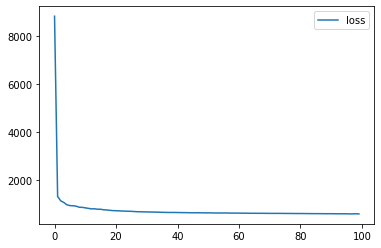

In [51]:
metrics30[['loss']].plot()

In [40]:
model30 = keras.models.load_model("my_dir/6ai-Conv-LSTM-30")

In [41]:
model30.predict((Wv30, Wv30x, Xv30))

array([[ 59.362713,  61.451447,  65.545166, ...,  62.3582  ,  41.758617,
         42.101933],
       [ 56.11957 ,  57.04493 ,  62.04149 , ...,  58.339157,  39.207508,
         40.50475 ],
       [ 54.83355 ,  55.541573,  60.59506 , ...,  57.656975,  38.7168  ,
         41.29214 ],
       ...,
       [144.08818 , 147.82149 , 160.07211 , ..., 158.37106 , 110.52066 ,
        101.146706],
       [134.45314 , 137.131   , 149.60303 , ..., 147.06601 , 100.94776 ,
         93.34111 ],
       [120.5532  , 122.69646 , 134.7485  , ..., 132.3018  ,  85.642555,
         80.892784]], dtype=float32)

# 60 mins ahead

In [44]:
def build_model_60(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wide_train_60.shape[1:], name="wide_week")
    channel_Widex = keras.layers.Input(shape=Wide_train_60_day.shape[1:], name="wide_day")
    channel_Deep = keras.layers.Input(shape=Xt60.shape[1:], name="deep_input")
    
    # Wide Model
    Wide_60 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_week_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Wide)
    
    Wide_60x = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_day_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Widex)
    
    # Deep Model
    # CNN 
    CNN_60a = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    CNN_60b = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(CNN_60a)
    flatten_60 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_60b)
    # LSTM          
    LSTM_60a = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(flatten_60)
    LSTM_60b = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(LSTM_60a)
    Att_60 = SeqSelfAttention(attention_activation='tanh')(LSTM_60b)
    Reshaped_60 = keras.layers.Flatten()(Att_60)
    
    # Concatenation 
    concat = keras.layers.concatenate([Wide_60, Wide_60x, Reshaped_60])
    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(concat)
    
    # Model
    model_60 = keras.Model(inputs=[channel_Wide, channel_Widex, channel_Deep], outputs=[output])

    # Compile
    model_60.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_60

In [45]:
tuner60 = RandomSearch(
    build_model_60,
    objective="val_loss",
    max_trials=30,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="6ai-Conv-LSTM-60",
)

INFO:tensorflow:Reloading Oracle from existing project C:\Runs\6ai-Conv-LSTM-60\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Runs\6ai-Conv-LSTM-60\tuner0.json


In [46]:
tuner60.search_space_summary()

Search space summary
Default search space size: 6
wide_week_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
wide_day_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [47]:
tuner60.search((Wt60, Wt60x, Xt60), yt60, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop],
            verbose=2)

Trial 31 Complete [00h 03m 25s]
val_loss: 925.2304992675781

Best val_loss So Far: 807.4200744628906
Total elapsed time: 12h 00m 51s
INFO:tensorflow:Oracle triggered exit


In [48]:
tuner60.results_summary(1)

Results summary
Results in C:\Runs\6ai-Conv-LSTM-60
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
wide_week_LSTM: 10
wide_day_LSTM: 91
filters: 192
kernel_size: 3
units_LSTM: 87
learning_rate: 0.0001
Score: 807.4200744628906


### Best model

In [49]:
best_hp60 = tuner60.get_best_hyperparameters()[0]
model60 = tuner60.hypermodel.build(best_hp60)

In [50]:
scaler_filename = "Best_HP/6ai-Conv-LSTM-60"
joblib.dump(best_hp60, scaler_filename) 

['Best_HP/6ai-Conv-LSTM-60']

In [51]:
model60.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 3, 5, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_3 (TimeDistri  (None, 3, 3, 5, 192  1920       ['deep_input[0][0]']             
 buted)                         )                                                                 
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 1, 3, 192  331968     ['time_distributed_3[0][0]']     
 buted)                         )                                                           

In [52]:
model60.fit((Wt60, Wt60x, Xt60), yt60, 
            epochs = 100, 
            verbose = 1
            )

Epoch 1/100
972/972 [==============================] - 28s 18ms/step - loss: 8370.2402 - mean_absolute_error: 59.5643 - root_mean_squared_error: 91.4890 - mean_absolute_percentage_error: 52017824.0000
Epoch 2/100
972/972 [==============================] - 18s 18ms/step - loss: 2042.7142 - mean_absolute_error: 34.9279 - root_mean_squared_error: 45.1964 - mean_absolute_percentage_error: 50795192.0000
Epoch 3/100
972/972 [==============================] - 18s 18ms/step - loss: 1648.6371 - mean_absolute_error: 30.5239 - root_mean_squared_error: 40.6034 - mean_absolute_percentage_error: 46225796.00004s - loss: 1706.1729 - m - ETA: 1s - loss: 1662.4106 - mean_absolute_error: 30.6869 - root_mean_squared_error: 40.7727 - mean_ab
Epoch 4/100
972/972 [==============================] - 18s 18ms/step - loss: 1416.3590 - mean_absolute_error: 28.0356 - root_mean_squared_error: 37.6345 - mean_absolute_percentage_error: 44761252.00007s - loss: 1406.72 - ETA: 3s - loss: 1387.6672 - mean_absolute_error:

972/972 [==============================] - 17s 18ms/step - loss: 732.1799 - mean_absolute_error: 19.9368 - root_mean_squared_error: 27.0588 - mean_absolute_percentage_error: 14642104.0000 9s - loss: 728.1537 - mean_absolute_error: 19.8735 - root_mean_squared_error: 26.9843 - mean_absolute_percentage_error: 1581 - ETA: 9s - loss: 726.0541 - mean_absolute_error: 19.86 - ETA: 3s - loss: 729.1963 - mean_absolute_error: 19.9169 - root_mean_squared_error: 27.0036 - mean_absolute_p - ETA: 2s - loss: 730.1625 - mean_absolute_error: 19.9239 - root_mean_squared_error: 27.0215 - mean_absolut
Epoch 54/100
972/972 [==============================] - 17s 18ms/step - loss: 731.1341 - mean_absolute_error: 19.9393 - root_mean_squared_error: 27.0395 - mean_absolute_percentage_error: 14478712.0000 17s - loss: 732.7 - ETA: 11s - loss: 738.7134 - mean_absolute_error: 20.0341 - root_mean_squared_error: 27.1793 - mean_absolute_percentag - ETA: 10s - loss: 737.8613 - mean_absolute_error: 20.0081 - root_mean_sq

972/972 [==============================] - 18s 19ms/step - loss: 657.2454 - mean_absolute_error: 18.9037 - root_mean_squared_error: 25.6368 - mean_absolute_percentage_error: 11707758.0000 16s - loss: 664.0757 - mean_absolute_error: 18.8322 - root_mean_squared_error: 25.7697 - mean_abs - ETA: 10s - loss: 660.4028 - mean_absolute_error: 18.9459 - root_mean_squared_error: 25.6983 - mean_absolute_pe - E - ETA: 0s - loss: 657.1262 - mean_absolute_error: 18.8992 - root_mean_squared_error: 25.6345 - mean_absolute_percentage_error: 1 - ETA: 0s - loss: 657.4495 - mean_absolute_error: 18.9063 - root_mean_squared_error: 25.6408 - mean_absolute_percentage_error: 11672513.000
Epoch 97/100
972/972 [==============================] - 18s 19ms/step - loss: 655.8201 - mean_absolute_error: 18.8804 - root_mean_squared_error: 25.6090 - mean_absolute_percentage_error: 11518820.0000
Epoch 98/100
972/972 [==============================] - 18s 19ms/step - loss: 657.0729 - mean_absolute_error: 18.8967 - root_me

In [53]:
model60.save("my_dir/6ai-Conv-LSTM-60")

INFO:tensorflow:Assets written to: my_dir/6ai-Conv-LSTM-60\assets


In [54]:
metrics60 = pd.DataFrame(model60.history.history)

<AxesSubplot:>

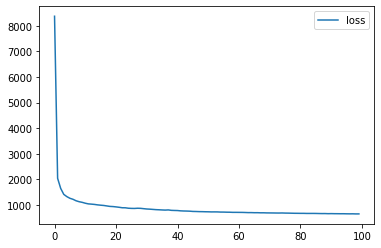

In [55]:
metrics60[['loss']].plot()

In [56]:
model60 = keras.models.load_model("my_dir/6ai-Conv-LSTM-60")

In [57]:
model60.predict((Wv60, Wv60x, Xv60))

array([[ 50.706543,  50.429993,  57.326973, ...,  57.013264,  38.76113 ,
         37.437603],
       [ 49.4272  ,  50.007206,  56.883232, ...,  56.45013 ,  40.10421 ,
         37.351295],
       [ 45.49115 ,  46.29246 ,  51.934925, ...,  50.562443,  36.61736 ,
         34.87856 ],
       ...,
       [137.31021 , 142.32536 , 152.76022 , ..., 149.8076  , 101.94714 ,
         91.46246 ],
       [133.27792 , 137.13042 , 149.68506 , ..., 146.3773  , 100.213554,
         88.98649 ],
       [127.16323 , 129.57072 , 144.35143 , ..., 138.19635 ,  93.68118 ,
         81.59623 ]], dtype=float32)